In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pluri_patients = pd.read_csv('pluri_patients_2020.csv', sep = ';')
pd.options.display.max_columns = None

There is a group of 13 variables related to the patient's billing information during 2020, from now on we will refer to these as *billing variables*.

In [4]:
#Let's check the type of the billing variables
billing_variables = ["fact_otros", "fact_estancias", "fact_ayudas_dx", "fact_interconsultas", "fact_medicamentos_insumos",
                     "fact_otros_conceptos", "fact_procedimientos_paquetes_qx", "fact_rondas", "fact_banco_sangre", 
                     "fact_planta_oxigeno", "fact_consulta_externa", "fact_salud_oral", "fact_total"]

pluri_patients[billing_variables].dtypes

fact_otros                          int64
fact_estancias                     object
fact_ayudas_dx                     object
fact_interconsultas                object
fact_medicamentos_insumos          object
fact_otros_conceptos               object
fact_procedimientos_paquetes_qx    object
fact_rondas                        object
fact_banco_sangre                  object
fact_planta_oxigeno                 int64
fact_consulta_externa              object
fact_salud_oral                     int64
fact_total                         object
dtype: object

The data type for all the billing variables should be float but there are only three that meet the requirement, it is necessary to make the conversion.

In [5]:
for col in billing_variables:
    pluri_patients[col]= pluri_patients[col].astype(str).str.replace(",", ".").astype(float)

In [6]:
pluri_patients[billing_variables].dtypes

fact_otros                         float64
fact_estancias                     float64
fact_ayudas_dx                     float64
fact_interconsultas                float64
fact_medicamentos_insumos          float64
fact_otros_conceptos               float64
fact_procedimientos_paquetes_qx    float64
fact_rondas                        float64
fact_banco_sangre                  float64
fact_planta_oxigeno                float64
fact_consulta_externa              float64
fact_salud_oral                    float64
fact_total                         float64
dtype: object

Now, let's check if there are null or empty values in the billing variables

In [7]:
pluri_patients[billing_variables].isnull().any().sum()

0

Just to be sure, we are goint to verify that the patient's total billing is the sum of the rest of variables and that there is no more missing information regarding to billing

In [8]:
total_sum = sum(abs(sum(pluri_patients[col] for col in billing_variables) - pluri_patients.fact_total*2))
total_sum

2.0917068468406796e-06

With this result (0) we confirm that a person's total billing is being discriminated in the dataset

#### Descriptive analysis

Taking into account that the sum of the first 12 variables is the total billing of a patient, let's see the most relevants variables or the ones that contributes the most to this final value.

In [9]:
(pluri_patients[billing_variables[0:12]].sum()*100/pluri_patients[billing_variables[0:12]].sum().sum()).sort_values(ascending = False)

fact_medicamentos_insumos          65.290610
fact_estancias                     14.239161
fact_ayudas_dx                      8.632151
fact_consulta_externa               3.356657
fact_otros_conceptos                3.236233
fact_planta_oxigeno                 1.475048
fact_procedimientos_paquetes_qx     1.407509
fact_rondas                         0.884472
fact_salud_oral                     0.676024
fact_interconsultas                 0.494613
fact_banco_sangre                   0.282409
fact_otros                          0.025114
dtype: float64

As paretto stated with the 80/20 we have two mayor variables that affect the most (79%) in terms of the total billing of a person, these are the drugs and supplies and the stay billing. 

Let's dig in 

In [10]:
pluri_patients[billing_variables].describe()

,fact_otros,fact_estancias,fact_ayudas_dx,fact_interconsultas,fact_medicamentos_insumos,fact_otros_conceptos,fact_procedimientos_paquetes_qx,fact_rondas,fact_banco_sangre,fact_planta_oxigeno,fact_consulta_externa,fact_salud_oral,fact_total
count,5.511000e+03,5.511000e+03,5.511000e+03,5.511000e+03,5.511000e+03,5.511000e+03,5.511000e+03,5.511000e+03,5.511000e+03,5.511000e+03,5.511000e+03,5.511000e+03,5.511000e+03
mean,2.328322e+03,1.320137e+06,8.003013e+05,4.585639e+04,6.053203e+06,3.000366e+05,1.304925e+05,8.200088e+04,2.618261e+04,1.367542e+05,3.112014e+05,6.267530e+04,9.271169e+06
std,5.011347e+04,2.622849e+06,1.307366e+06,1.568393e+05,7.388460e+06,2.202937e+06,9.495756e+05,1.947254e+05,2.376724e+05,6.535212e+05,3.335660e+05,1.116572e+05,1.142249e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.066920e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.517145e+05,0.000000e+00,2.249415e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.740000e+04,0.000000e+00,3.617370e+06
50%,0.000000e+00,0.000000e+00,3.650926e+05,0.000000e+00,4.497173e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.084300e+05,3.400000e+04,6.667759e+06
75%,0.000000e+00,2.021904e+06,9.239492e+05,0.000000e+00,7.934516e+06,1.709750e+04,0.000000e+00,7.733540e+04,0.000000e+00,0.000000e+00,4.434340e+05,5.420000e+04,1.115052e+07
max,1.739431e+06,3.947940e+07,2.337378e+07,2.672456e+06,2.058979e+08,3.348660e+07,2.608574e+07,3.592219e+06,6.648882e+06,1.380079e+07,3.383679e+06,1.312500e+06,2.472228e+08


It is not very easy to identify important aspects of the data because of the way the number is presented, a box plot could give us a better image.

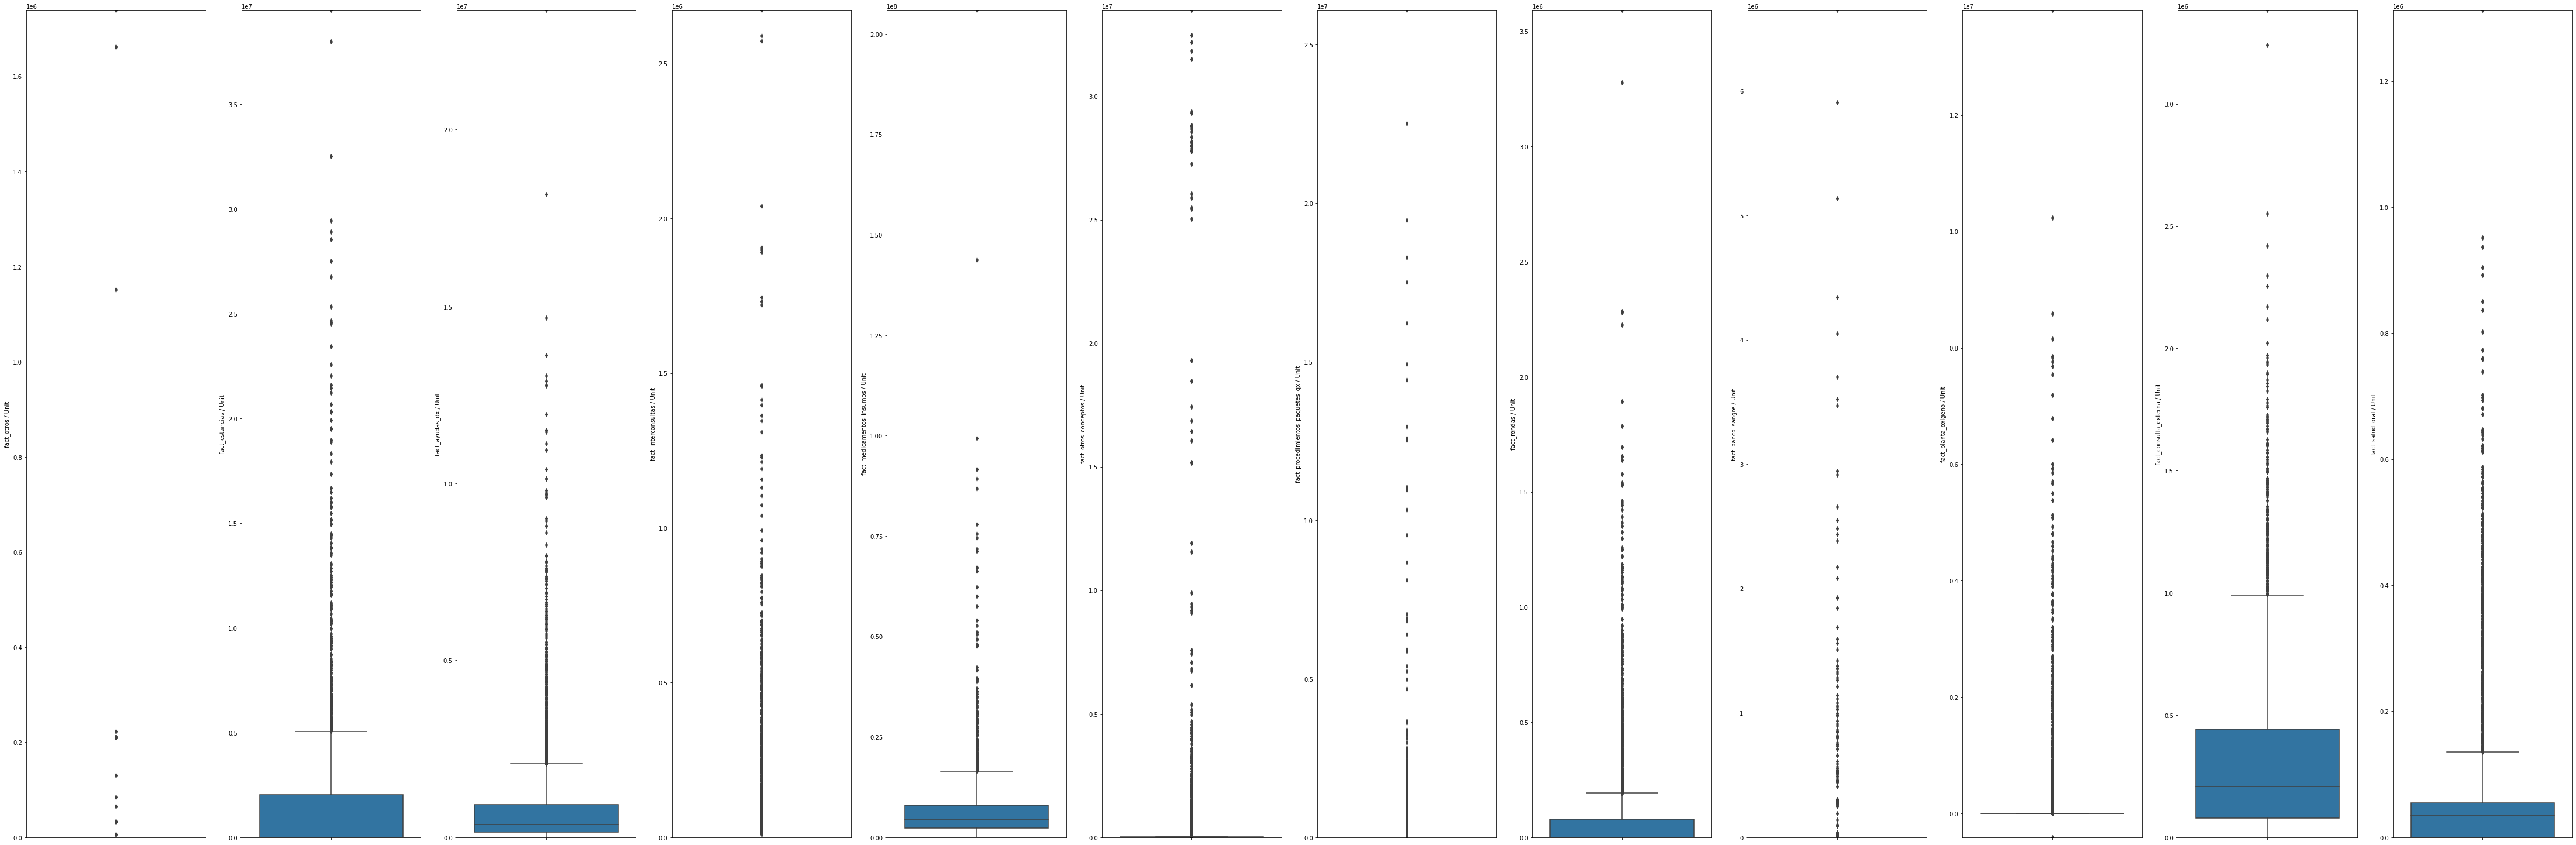

In [19]:
fig, axes = plt.subplots(1, pluri_patients[billing_variables].shape[1]-1)
for i, col in enumerate(pluri_patients[billing_variables].columns[:-1]):
    ax = sns.boxplot(y=pluri_patients[col], ax=axes.flatten()[i])
    ax.set_ylim(pluri_patients[col].min(), pluri_patients[col].max())
    ax.set_ylabel(col + ' / Unit')
plt.rcParams['figure.figsize'] = (78,26)
plt.show()

The box plot indicates that the data is widely dispersed with several atypical values, however these values shouldn't be removed because they can be a indicator of the vital state of a patient.
Also, billing is one of the most critical aspects in Health Care Providers, this means that information regarding this topic must be truthful and accurate.

Text(0.5, 0.98, 'Billing in COP vs Number of Patients')

<Figure size 1152x864 with 0 Axes>

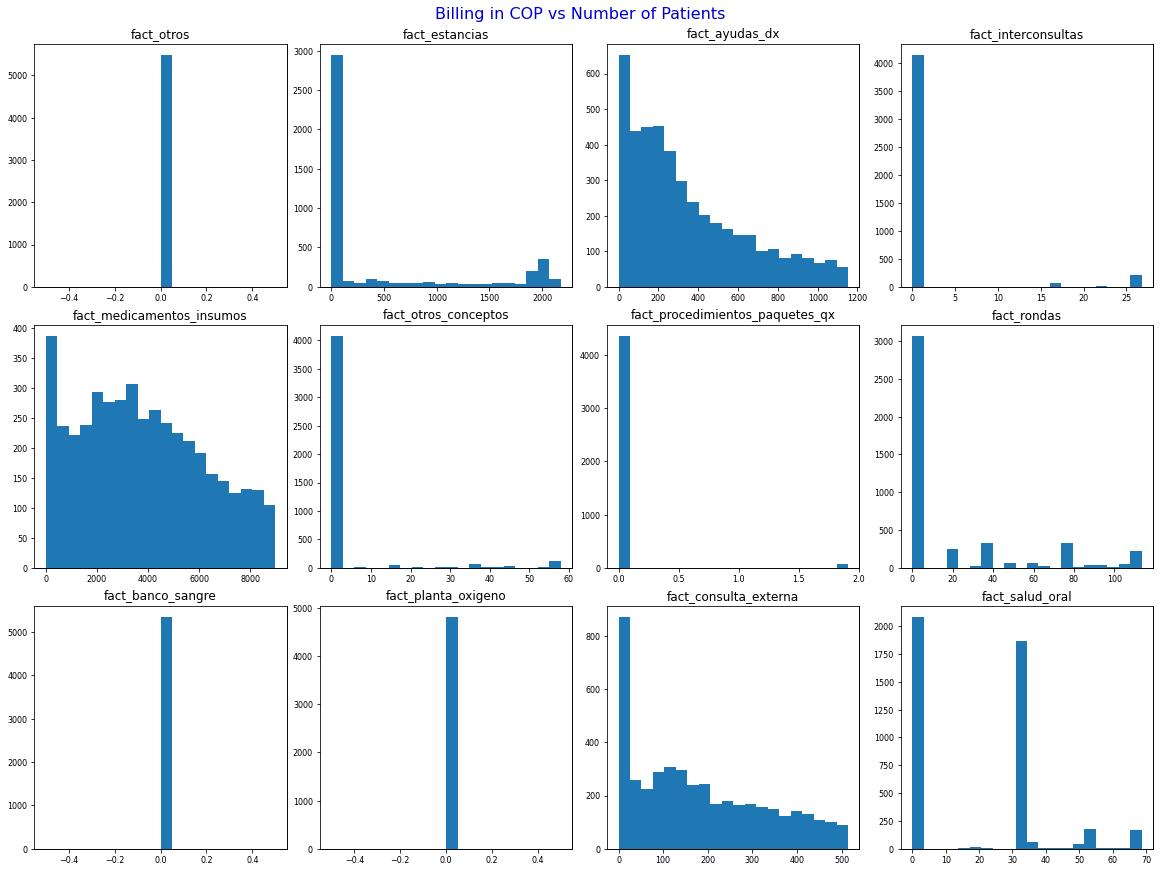

In [13]:
plt.figure()
fig, axs = plt.subplots(3,4, sharey= True, constrained_layout = True)
plt.yticks([])

for i in range (0,3):
    for j in range (0,4):
        axs[i, j].get_xaxis().set_visible(False)
plt.rcParams["figure.figsize"] = (16,12)

for i in range (0,12):
    fig.add_subplot (3,4,i+1)
    _ = plt.hist(pluri_patients[billing_variables[i]]/1000 , bins=20,
                 range = (0, pluri_patients[billing_variables[i]].quantile(0.8)/1000) )
    plt.xticks( fontsize = 8)
    plt.yticks(fontsize = 8)
    plt.title(billing_variables[i])
fig.suptitle('Billing in COP vs Number of Patients', fontsize=16, color = "mediumblue")

Drugs and  supplies billing as expected exhibits the larger amount and is skewed to the right. The billing stays amount presents a high concentration of values less than 100.000 COP but is influenced by extreme values. 
On the other hand, there are a group of billing variables close to 0 like fact_planta_oxigeno, fact_banco_sangre_fact_otros, etc. 

Let's see the correlation.

In [21]:
#Change estado_vital as boolean. Vivo = 0, fallecido =1
pluri_patients["estado_vital"] = pluri_patients["estado_vital"].replace("fallecido","1")
pluri_patients["estado_vital"] = pluri_patients["estado_vital"].replace("vivo","0")
pluri_patients["estado_vital"] = pd.to_numeric(pluri_patients["estado_vital"],errors = "coerce")
corr_billing = pluri_patients.loc[:,[ "estado_vital","fact_otros", "fact_estancias", "fact_ayudas_dx", "fact_interconsultas", "fact_medicamentos_insumos","fact_otros_conceptos", "fact_procedimientos_paquetes_qx", "fact_rondas", "fact_banco_sangre", "fact_planta_oxigeno", "fact_consulta_externa", "fact_salud_oral", "fact_total"]].corr()
corr_billing_def = corr_billing[["estado_vital"]]
corr_billing_def.style.background_gradient(cmap='coolwarm')

,estado_vital
estado_vital,1.000000
fact_otros,-0.002708
fact_estancias,0.229195
fact_ayudas_dx,0.185168
fact_interconsultas,0.226073
fact_medicamentos_insumos,0.069917
fact_otros_conceptos,0.051723
fact_procedimientos_paquetes_qx,0.057207
fact_rondas,0.212120
fact_banco_sangre,0.112176


There is not a strong correlation between the billing variables and the vital state of a person. But there are insteresting points:
- The year 2020 corresponds to the year where the covid 19 pandemic began in Colombia, this disease is characterized by respiratory problems and in severe cases hospitalization and oxygen supply, this can be the reason why the oxygen is the variable with the highest correlation to the vital state of a patient. 
- Besides oxygen and the relation with the vital state, the billing stays and medical rounds indicates patient hospitalization which implies poor health. Another variable is medical interconsultation for people that requiere the evaluation of a specialist. 
- The most influential variable in a patient's billing (medicines and supplies) does not have a correlation with the vital state because in most cases being under medicine treatment does not mean risk of death.